In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from tqdm import tqdm
import os
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

In [9]:
###................Functions................###

def calculateHeat(cellTemp, neighborTemps, gamma):
    cellTemp = cellTemp + gamma*((neighborTemps[0] -2*cellTemp + neighborTemps[-1]) + (neighborTemps[1] -2*cellTemp + neighborTemps[-2]))
    #print(cellTemp)
    return np.float64(cellTemp)

def heatTransfer(grid):
    rows, cols = len(grid), len(grid[0])
    for i in range(rows):
        for j in range(cols):
            neighbors = getNeighborsTemperature(grid[:,:,0], (i,j))
            grid[:,:,0][i][j] = calculateHeat(grid[:,:,0][i][j], neighbors, grid[:,:,1][i][j])
    return grid

def calculateAverageTemperature(grid):
    # Extract the temperature values from the grid
    temperatures = grid[:, :, 0]

    # Create a mask for the circle

    # Calculate the average temperature within the circle
    average_temperature = np.mean(temperatures)
    
    return average_temperature

###...................................................Neumann boundary condition...................................................###
def getNeighborsTemperature(grid, point):
    neighbors = []
    
    rows = len(grid)
    cols = len(grid[0])

    for i in range(-1, 2):
        for j in range(-1, 2):
            try:
                if abs(i) != abs(j):
                    neighbor_temp = grid[point[0] + i][point[1] + j]
                    neighbors.append(neighbor_temp)
            except IndexError:
                ###...Edge or corner point...###
                # Upper edge point:
                if point[0] == 0:
                    # upper left corner point
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0] + 1][point[1]] # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] # j!=0
                            neighbors.append(boundary_temp)
                    # upper right corner point
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] # j!=0
                            neighbors.append(boundary_temp)
                    # upper edge
                    else:
                        boundary_temp = grid[point[0]][point[1]-1]
                        neighbors.append(boundary_temp)
                
                # lower edge point
                elif point[0] == rows - 1:
                    # Lower left corner
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0]+1][point[1]] # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower right corner
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower edge
                    else:
                        boundary_temp = grid[point[0]][point[1]+1] # j!=0
                        neighbors.append(boundary_temp)
                
                # left edge
                elif point[1] == 0:
                    boundary_temp = grid[point[0]+1][point[1]] # i!=0
                    neighbors.append(boundary_temp)
                
                # right edge
                elif point[1] == cols - 1:
                    boundary_temp = grid[point[0]-1][point[1]] # i!=0
                    neighbors.append(boundary_temp)

    return neighbors

def makeGif_single(frames,timeStep,minTemp,maxTemp, folder_name):
        counter=0
        images = []
        for i in tqdm(range(0,len(frames))):
                plt.figure()
                plt.title(f"Temperature at t = {counter*timeStep:.3f} unit time")
                plt.xlabel("x")
                plt.ylabel("y")
                plt.pcolormesh(frames[i], cmap = "inferno" , vmin = minTemp, vmax = maxTemp)
                plt.colorbar()
                plt.savefig("frames/"+ folder_name+"/"+ str(counter)+ ".png")
                images.append(imageio.imread("frames/"+ folder_name+"/"+ str(counter)+ ".png"))
                counter += 1
                plt.close()

        imageio.mimsave(folder_name + ".gif", images)


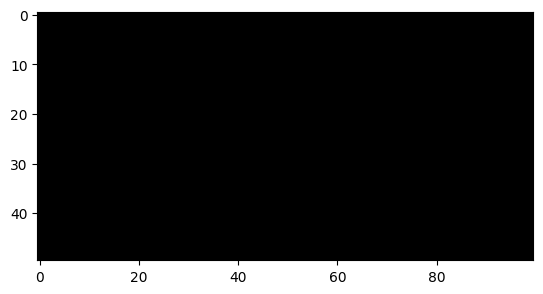

100%|██████████| 1000/1000 [00:39<00:00, 25.43it/s]


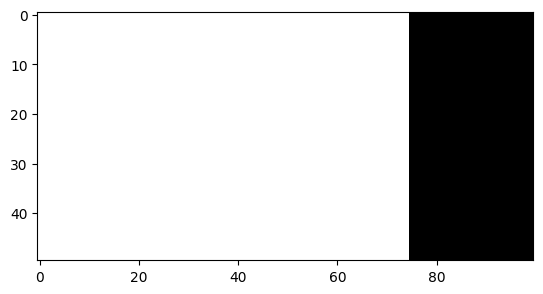

100%|██████████| 1000/1000 [00:38<00:00, 25.72it/s]


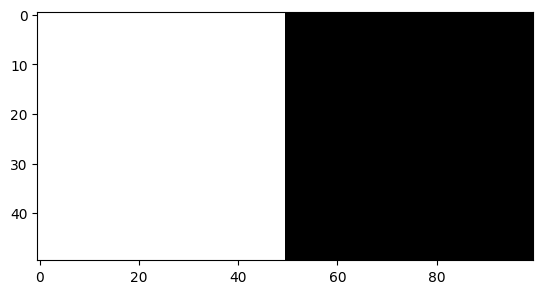

100%|██████████| 1000/1000 [00:39<00:00, 25.44it/s]


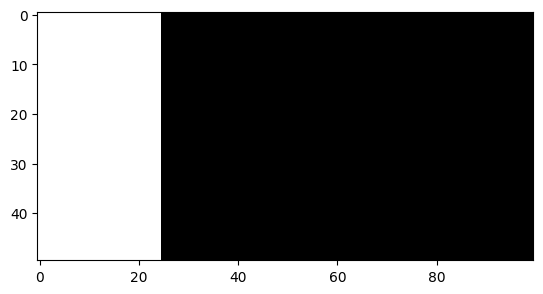

100%|██████████| 1000/1000 [00:38<00:00, 25.68it/s]


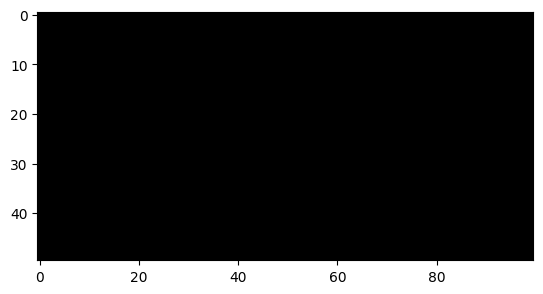

100%|██████████| 1000/1000 [00:38<00:00, 25.73it/s]


In [13]:
###.........Heat simulation with highest fill factor.........###
#Make mesh grid
resolution_array = [100,75,50,25,0]
folder_name = []
temp_array = []
startingTemperature = 103.15 # Round about -170C°
gamma = 0.05
timeStep = 0.000158 
boundaryTemp = 103.15
time_step_number = 1000


#Add heat
value_to_add = 492.2

for i in range(len(resolution_array)):

        resolution = 100

        # Konfiguriere das Gitter
        x1 = np.full(resolution, startingTemperature)
        y1 = np.full(50, startingTemperature)

        x2 = np.full(resolution, gamma)
        y2 = np.full(50, gamma)

        gridX, gridY = np.meshgrid(x1, y1)
        gridX2, gridY2 = np.meshgrid(x2, y2)

        fullGridX = np.dstack([gridX, gridX2])
        fullGridY = np.dstack([gridY, gridY2])

        # Füge value_to_add den ersten beiden Zeilen der ersten Dimension von fullGridX hinzu
        fullGridX[:, :resolution_array[i], 0] += value_to_add

        # Erstelle eine Maske für Werte größer als 0.5

        mask = np.zeros((50, resolution), dtype=np.uint8)
        mask[:, :resolution_array[i]] = 1

        # Plotte die erstellte Maske
        white_image = Image.new('L', (resolution, 50), 255)
        white_image = white_image * mask
        plt.imshow(white_image, cmap='gray')
        plt.show()

        
        #Run simulation
        frames = [fullGridX[:,:,0].copy()]

        average_temperature= []
        temp = []
        for t in tqdm(range(0,time_step_number)):
                # Calculate the average temperature within the circle and append to the list
                average_temp = calculateAverageTemperature(fullGridX)
                temp.append(average_temp)
                
                # Calculate the heat
                fullGridX = heatTransfer(fullGridX.copy())
                frames.append(fullGridX[:,:,0].copy())
        temp_array.append(temp)


        #Make Gif, saves as "simulation.gif"
        #makeGif_single(frames,timeStep,103.15,500, folder_name[i])

In [14]:
file_path = 'heating_array.txt'

np.savetxt(file_path,temp_array, delimiter=',', newline='\n', fmt='%f')

loaded_array= np.loadtxt(file_path, delimiter=',')
print(len(loaded_array))

5


In [15]:
file_path = 'heating_array.txt'

loaded_array= np.loadtxt(file_path, delimiter=',')
print(len(loaded_array[1]))

# Define the colors for the colormap: red (1, 0, 0), purple (0.5, 0, 0.5), blue (0, 0, 1)
colors = [(0, 0, 0.8), (0.7, 0.7, 0), (0.8, 0, 0)]
#colors = [(0, 0, 0.8), (0.5, 0, 0.5), (0.8, 0, 0)]

# Number of colors in the colormap
n_colors = 20

# Create the colormap
blue_yellow_red_cmap = LinearSegmentedColormap.from_list("red_purpel_blue", colors, N=n_colors)

# Create an array of colors from red to blue via purple
color_array = blue_yellow_red_cmap(np.linspace(0, 1, n_colors))

1000


In [16]:
timeStep = 0.000158
specific_point = timeStep*999.5
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
len(time_step_array)

1000

0
1
2
3
4


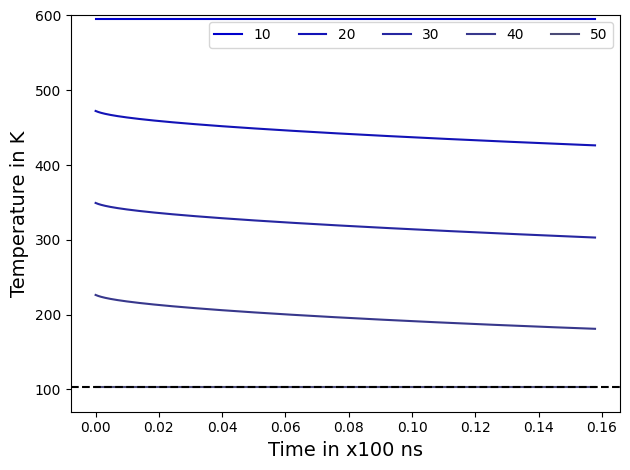

In [17]:
# Plot the Result
plt.minorticks_on
plt.xlabel(r'Time in x100 ns', fontsize="14")
plt.ylabel(r"Temperature in K", fontsize="14")
label_arr = ["10","20","30","40","50"]

for i in range(len(loaded_array)):
    print(i)
    plt.plot(time_step_array, loaded_array[i], color= color_array[i])

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--', label='origin temperature')
plt.ylim(70, 600)
plt.legend(label_arr, loc="upper right", bbox_to_anchor = (1.0,1.0), ncol=6)
plt.tight_layout()
plt.show()